In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
 13  Customer_Segment      178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


<AxesSubplot:>

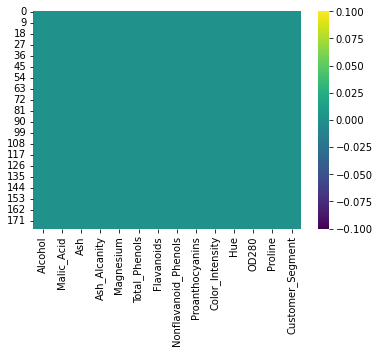

In [6]:
sns.heatmap(df.isnull(), cmap='viridis')

In [7]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,1.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,1.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,1.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,2.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,3.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,3.000000


In [8]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [9]:
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3, random_state=1)


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [13]:
from sklearn.metrics import accuracy_score, classification_report

In [21]:
models = []
accuracy = []

models.append(('logreg',LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('DT-e',DecisionTreeClassifier(criterion='entropy')))

for name,model in models:
              model.fit(xtrain,ytrain)
              ypred = model.predict(xtest)
              ac = accuracy_score(ytest,ypred)
              accuracy.append(ac)
              
arr = np.array(accuracy)
print(arr)
print(f"Average accuracy : {arr.mean()}")

[0.96296296 0.92592593 0.96296296]
Average accuracy : 0.9506172839506172


In [23]:
models

[('logreg', LogisticRegression()),
 ('DT', DecisionTreeClassifier()),
 ('DT-e', DecisionTreeClassifier(criterion='entropy'))]

In [22]:
from sklearn.ensemble import VotingClassifier

In [24]:
vc = VotingClassifier(estimators=models)
vc.fit(xtrain, ytrain)
pred = vc.predict(xtest)

train = vc.score(xtrain,ytrain)
test = vc.score(xtest,ytest)

print(f"Training Accuracy : {train}\nTesting accuracy : {test}")
print(classification_report(ytest,pred))

Training Accuracy : 1.0
Testing accuracy : 0.9814814814814815
              precision    recall  f1-score   support

           1       1.00      0.96      0.98        23
           2       0.95      1.00      0.97        19
           3       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.98      0.99      0.98        54
weighted avg       0.98      0.98      0.98        54



In [25]:
vc = VotingClassifier(estimators=models, voting='soft')
vc.fit(xtrain, ytrain)
pred = vc.predict(xtest)

train = vc.score(xtrain,ytrain)
test = vc.score(xtest,ytest)

print(f"Training Accuracy : {train}\nTesting accuracy : {test}")
print(classification_report(ytest,pred))

Training Accuracy : 1.0
Testing accuracy : 0.9814814814814815
              precision    recall  f1-score   support

           1       1.00      0.96      0.98        23
           2       0.95      1.00      0.97        19
           3       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.98      0.99      0.98        54
weighted avg       0.98      0.98      0.98        54



In [26]:
from sklearn.ensemble import BaggingClassifier

In [27]:
bg = BaggingClassifier(LogisticRegression())

bg.fit(xtrain,ytrain)
pred = bg.predict(xtest)

train = bg.score(xtrain,ytrain)
test = bg.score(xtest,ytest)

print(f"Training Accuracy : {train}\nTesting accuracy : {test}")
print(classification_report(ytest,pred))

Training Accuracy : 0.967741935483871
Testing accuracy : 0.9629629629629629
              precision    recall  f1-score   support

           1       1.00      0.96      0.98        23
           2       0.90      1.00      0.95        19
           3       1.00      0.92      0.96        12

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54



In [28]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
kbg = BaggingClassifier(KNeighborsClassifier(), n_estimators=15)
kbg.fit(xtrain,ytrain)

ypred = kbg.predict(xtest)

train = kbg.score(xtrain,ytrain)
test = kbg.score(xtest,ytest)

print(f"Train : {train}\ntest: {test}")
print(classification_report(ytest,ypred))

Train : 0.8225806451612904
test: 0.6666666666666666
              precision    recall  f1-score   support

           1       0.95      0.78      0.86        23
           2       0.60      0.63      0.62        19
           3       0.40      0.50      0.44        12

    accuracy                           0.67        54
   macro avg       0.65      0.64      0.64        54
weighted avg       0.70      0.67      0.68        54



In [31]:
bg = BaggingClassifier(DecisionTreeClassifier(), n_estimators=15)
bg.fit(xtrain,ytrain)

ypred = bg.predict(xtest)

train = bg.score(xtrain,ytrain)
test = bg.score(xtest,ytest)

print(f"Train : {train}\ntest: {test}")
print(classification_report(ytest,ypred))

Train : 1.0
test: 0.9814814814814815
              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       1.00      0.95      0.97        19
           3       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf = RandomForestClassifier()

rf.fit(xtrain,ytrain)

pred= rf.predict(xtest)

train = rf.score(xtrain,ytrain)
test = rf.score(xtest,ytest)

print(f"Train : {train}\ntest: {test}")
print(classification_report(ytest,ypred))

Train : 1.0
test: 0.9814814814814815
              precision    recall  f1-score   support

           1       0.96      1.00      0.98        23
           2       1.00      0.95      0.97        19
           3       1.00      1.00      1.00        12

    accuracy                           0.98        54
   macro avg       0.99      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54

